# Project: Learning to Label – From Clustering to Classification
In the real world, data rarely comes with clean labels. As a machine learning engineer at a data-centric company, you’re handed fairly large, unlabelled datasets across two domains—images and text. Your team is tasked with building a functional classification system, but without labeled training data, the first challenge is to create your own labels. Welcome to your mission: learning to label intelligently and building robust classifiers from scratch.

This project simulates the workflow of a modern unsupervised-to-supervised machine learning pipeline. It is structured in two stages, each of which builds upon the other:

# Image Dataset

In [2]:
import numpy as np

original_images_df = np.load('unlabelled_train_data_images.npy',allow_pickle=True)
original_images_df.shape

(60000, 1, 28, 28)

In [3]:
original_images_df

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

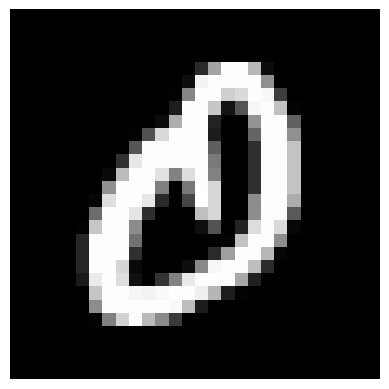

In [4]:
import matplotlib.pyplot as plt
def view_img(df, idx):
    img = df[idx]
    img = img.squeeze()
    plt.imshow(img, cmap='gray')
    # plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

view_img(original_images_df, 2)

# Text Dataset

In [41]:
import pickle
import pandas as pd

original_text_df = pickle.load(open('train_data_text.pkl', 'rb'))

In [42]:
text_df= original_text_df.copy()
text_df= pd.DataFrame(original_text_df.copy(), columns=['text'])
#text_df['text']= text_df['text'].str.lower()
#text_df['text']= text_df['text'].str.replace(r'[^a-zA-Z0-9\s]','',regex=True)

In [43]:
import nltk
nltk.download('stopwords')
import re

def process_text(text):
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    lemmatizer= WordNetLemmatizer()
    stop_words= set(stopwords.words('english'))
    text= text.lower()
    processed_text= re.sub(r'[^a-zA-Z0-9\s]','',text)

    token= [ lemmatizer.lemmatize(word) for word in processed_text.split() if word not in stop_words]
    return ' '.join(token)

text_df['processed_text']= text_df['text'].apply(process_text)

[nltk_data] Downloading package stopwords to /home/ruksad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
text_df 

,text,processed_text
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...,article 93089204431grv101psuvmpsuedu callec dr...
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,article 1993apr191311027843rchlandibmcom xzz02...
2,\nYou can get a *little* UV by putting a heavy...,get little uv putting heavy uv filter deep pur...
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntppostinghost accessdigexnet trouble trying ...
4,\n\n\nI understand that the new GPS boxes now ...,understand new gps box option known differenti...
...,...,...
1495,Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...,nntppostinghost wcsubctstateuedu organization ...
1496,\nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...,c5tvl21inhermeshrzunibielefeldde hoovermathema...
1497,"\nIn article <79895@cup.portal.com>, Thyagi@cu...",article 79895cupportalcom thyagicupportalcom t...
1498,"\n3500 miles, black leather tank bra, tank bag...",3500 mile black leather tank bra tank bag corb...


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


def count_vectorize(df):
    vectorizer= CountVectorizer()
    vectors= vectorizer.fit_transform(df['processed_text']).toarray()
    df['count_vector']= list(vectors)
    return vectors, vectorizer.vocabulary_

def tfidf_vectorizer(df):
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    tfidf_vectors = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()
    df['tfidf_vector'] = list(tfidf_vectors)
    return tfidf_vectors

def word2Vec_vectorizer(df):
    from gensim.models import Word2Vec

    # Train the Word2Vec model
    model = Word2Vec(sentences=df['processed_text'].apply(lambda x: x.split()), vector_size=250, window=5, min_count=1, workers=4)

    # Function to vectorize text using the Word2Vec model
    def vectorize(text):
        words = text.split()
        # Compute the mean of word vectors, or use a zero vector if no words are in the vocabulary
        return np.mean([model.wv[word] for word in words if word in model.wv.key_to_index] or [np.zeros(model.vector_size)], axis=0)

    # Apply the vectorization function to the processed_text column
    df['word2vec'] = df['processed_text'].apply(vectorize)
    return np.array(df['word2vec'].tolist())


In [62]:
# Generate vectorizations 
count_vectors, count_vectorizer_vocab = count_vectorize(text_df)
tfidf_vectors = tfidf_vectorizer(text_df)
word2vec_vectors = word2Vec_vectorizer(text_df)

text_df 


,text,processed_text,count_vector,tfidf_vector,word2vec,count_vector_cluster,tfidf_vector_cluster,word2vec_cluster
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...,article 93089204431grv101psuvmpsuedu callec dr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13272771583061566, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.3276606, -0.088350356, 0.29693392, 0.189302...",0,3,0
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,article 1993apr191311027843rchlandibmcom xzz02...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.38561186, -0.10800423, 0.34846324, 0.218907...",0,1,1
2,\nYou can get a *little* UV by putting a heavy...,get little uv putting heavy uv filter deep pur...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.29504526, -0.07852392, 0.27398393, 0.179631...",0,2,3
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntppostinghost accessdigexnet trouble trying ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.28397033, -0.07506709, 0.25680313, 0.162906...",0,3,3
4,\n\n\nI understand that the new GPS boxes now ...,understand new gps box option known differenti...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.28102568, -0.072217435, 0.25796387, 0.16602...",0,2,3
...,...,...,...,...,...,...,...,...
1495,Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...,nntppostinghost wcsubctstateuedu organization ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.10147120584977741, 0.1174319...","[0.28948838, -0.07803371, 0.25977, 0.16358633,...",0,2,3
1496,\nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...,c5tvl21inhermeshrzunibielefeldde hoovermathema...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4081518, -0.11040659, 0.37382647, 0.2412949...",0,3,1
1497,"\nIn article <79895@cup.portal.com>, Thyagi@cu...",article 79895cupportalcom thyagicupportalcom t...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2995023, -0.08067367, 0.27043873, 0.1701105...",0,2,3
1498,"\n3500 miles, black leather tank bra, tank bag...",3500 mile black leather tank bra tank bag corb...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.27379784, -0.07219256, 0.2511807, 0.1618141...",0,4,4


In [ ]:

# # Save the vectorized data
# np.save('count_vectors.npy', count_vectors)
# np.save('tfidf_vectors.npy', tfidf_vectors)
# np.save('word2vec_vectors.npy', word2vec_vectors)
# # Save the vectorizer   
#with open('count_vectorizer.pkl', 'wb') as f:
#    pickle.dump(count_vectorizer_vocab, f)
# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(tfidf_vectorizer, f)    
# # Save the processed text data
# text_df.to_csv('processed_text.csv', index=False)
# # Save the original text data
# original_text_df.to_csv('original_text.csv', index=False)

In [63]:
# Apply KMeans clustering to count_vector, tfidf_vector, and word2vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# KMeans for count_vector
kmeans_count = KMeans(n_clusters=5, random_state=42)
text_df['count_vector_cluster'] = kmeans_count.fit_predict(np.array(text_df['count_vector'].tolist()))
kmeans_count_lables= kmeans_count.labels_

# KMeans for tfidf_vector
kmeans_tfidf = KMeans(n_clusters=5, random_state=42)
text_df['tfidf_vector_cluster'] = kmeans_tfidf.fit_predict(np.array(text_df['tfidf_vector'].tolist()))
kmeans_tfidf_lables= kmeans_tfidf.labels_

# KMeans for word2vec
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
text_df['word2vec_cluster'] = kmeans_word2vec.fit_predict(np.array(text_df['word2vec'].tolist()))
kmeans_word2vec_lables= kmeans_word2vec.labels_

summary_metrics= pd.DataFrame({
    "Vector Method": ["count-vector", "tf-idf-vector", "word2vec"],
    "Inertia": [
        kmeans_count.inertia_,
        kmeans_tfidf.inertia_,
        kmeans_word2vec.inertia_
    ],
    "Silhouette Score": [
        silhouette_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        silhouette_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        silhouette_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
        ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        calinski_harabasz_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        calinski_harabasz_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        davies_bouldin_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        davies_bouldin_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ]
})

summary_metrics

,Vector Method,Inertia,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,count-vector,517240.963710,0.882211,579.737830,1.234039
1,tf-idf-vector,1386.797543,0.197187,144.834122,1.430685
2,word2vec,71.021179,0.515056,1922.090100,0.622817


In [64]:
text_df

,text,processed_text,count_vector,tfidf_vector,word2vec,count_vector_cluster,tfidf_vector_cluster,word2vec_cluster
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...,article 93089204431grv101psuvmpsuedu callec dr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13272771583061566, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.3276606, -0.088350356, 0.29693392, 0.189302...",0,3,3
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,article 1993apr191311027843rchlandibmcom xzz02...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.38561186, -0.10800423, 0.34846324, 0.218907...",0,1,4
2,\nYou can get a *little* UV by putting a heavy...,get little uv putting heavy uv filter deep pur...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.29504526, -0.07852392, 0.27398393, 0.179631...",0,2,0
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntppostinghost accessdigexnet trouble trying ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.28397033, -0.07506709, 0.25680313, 0.162906...",0,3,0
4,\n\n\nI understand that the new GPS boxes now ...,understand new gps box option known differenti...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.28102568, -0.072217435, 0.25796387, 0.16602...",0,2,0
...,...,...,...,...,...,...,...,...
1495,Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...,nntppostinghost wcsubctstateuedu organization ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.10147120584977741, 0.1174319...","[0.28948838, -0.07803371, 0.25977, 0.16358633,...",0,2,0
1496,\nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...,c5tvl21inhermeshrzunibielefeldde hoovermathema...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4081518, -0.11040659, 0.37382647, 0.2412949...",0,3,4
1497,"\nIn article <79895@cup.portal.com>, Thyagi@cu...",article 79895cupportalcom thyagicupportalcom t...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2995023, -0.08067367, 0.27043873, 0.1701105...",0,2,0
1498,"\n3500 miles, black leather tank bra, tank bag...",3500 mile black leather tank bra tank bag corb...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.27379784, -0.07219256, 0.2511807, 0.1618141...",0,4,0


In [73]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Method 1: Apply t-SNE
def apply_tsne(data, n_components=2, random_state=42):
    """
    Applies t-SNE to reduce data to n_components dimensions.
    
    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for t-SNE.
        random_state (int): Random state for reproducibility.
    
    Returns:
        numpy.ndarray: t-SNE reduced data.
    """
    tsne = TSNE(n_components=n_components, random_state=random_state)
    return tsne.fit_transform(data)

# Method 2: Apply PCA
def apply_pca(data, n_components=2):
    """
    Applies PCA to reduce data to n_components dimensions.
    
    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for PCA.
    
    Returns:
        numpy.ndarray: PCA reduced data.
    """
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Method 3: Plotting
def plot_clusters(ax, data, labels, title, xlabel, ylabel, cmap='viridis', s=10):
    """
    Plots clusters on the given axes.
    
    Parameters:
        ax (matplotlib.axes.Axes): Axes object to plot on.
        data (numpy.ndarray): 2D data to plot (e.g., PCA or t-SNE output).
        labels (numpy.ndarray): Cluster labels for coloring.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        cmap (str): Colormap for the scatter plot.
        s (int): Marker size for the scatter plot.
    """
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap, s=s)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return scatter

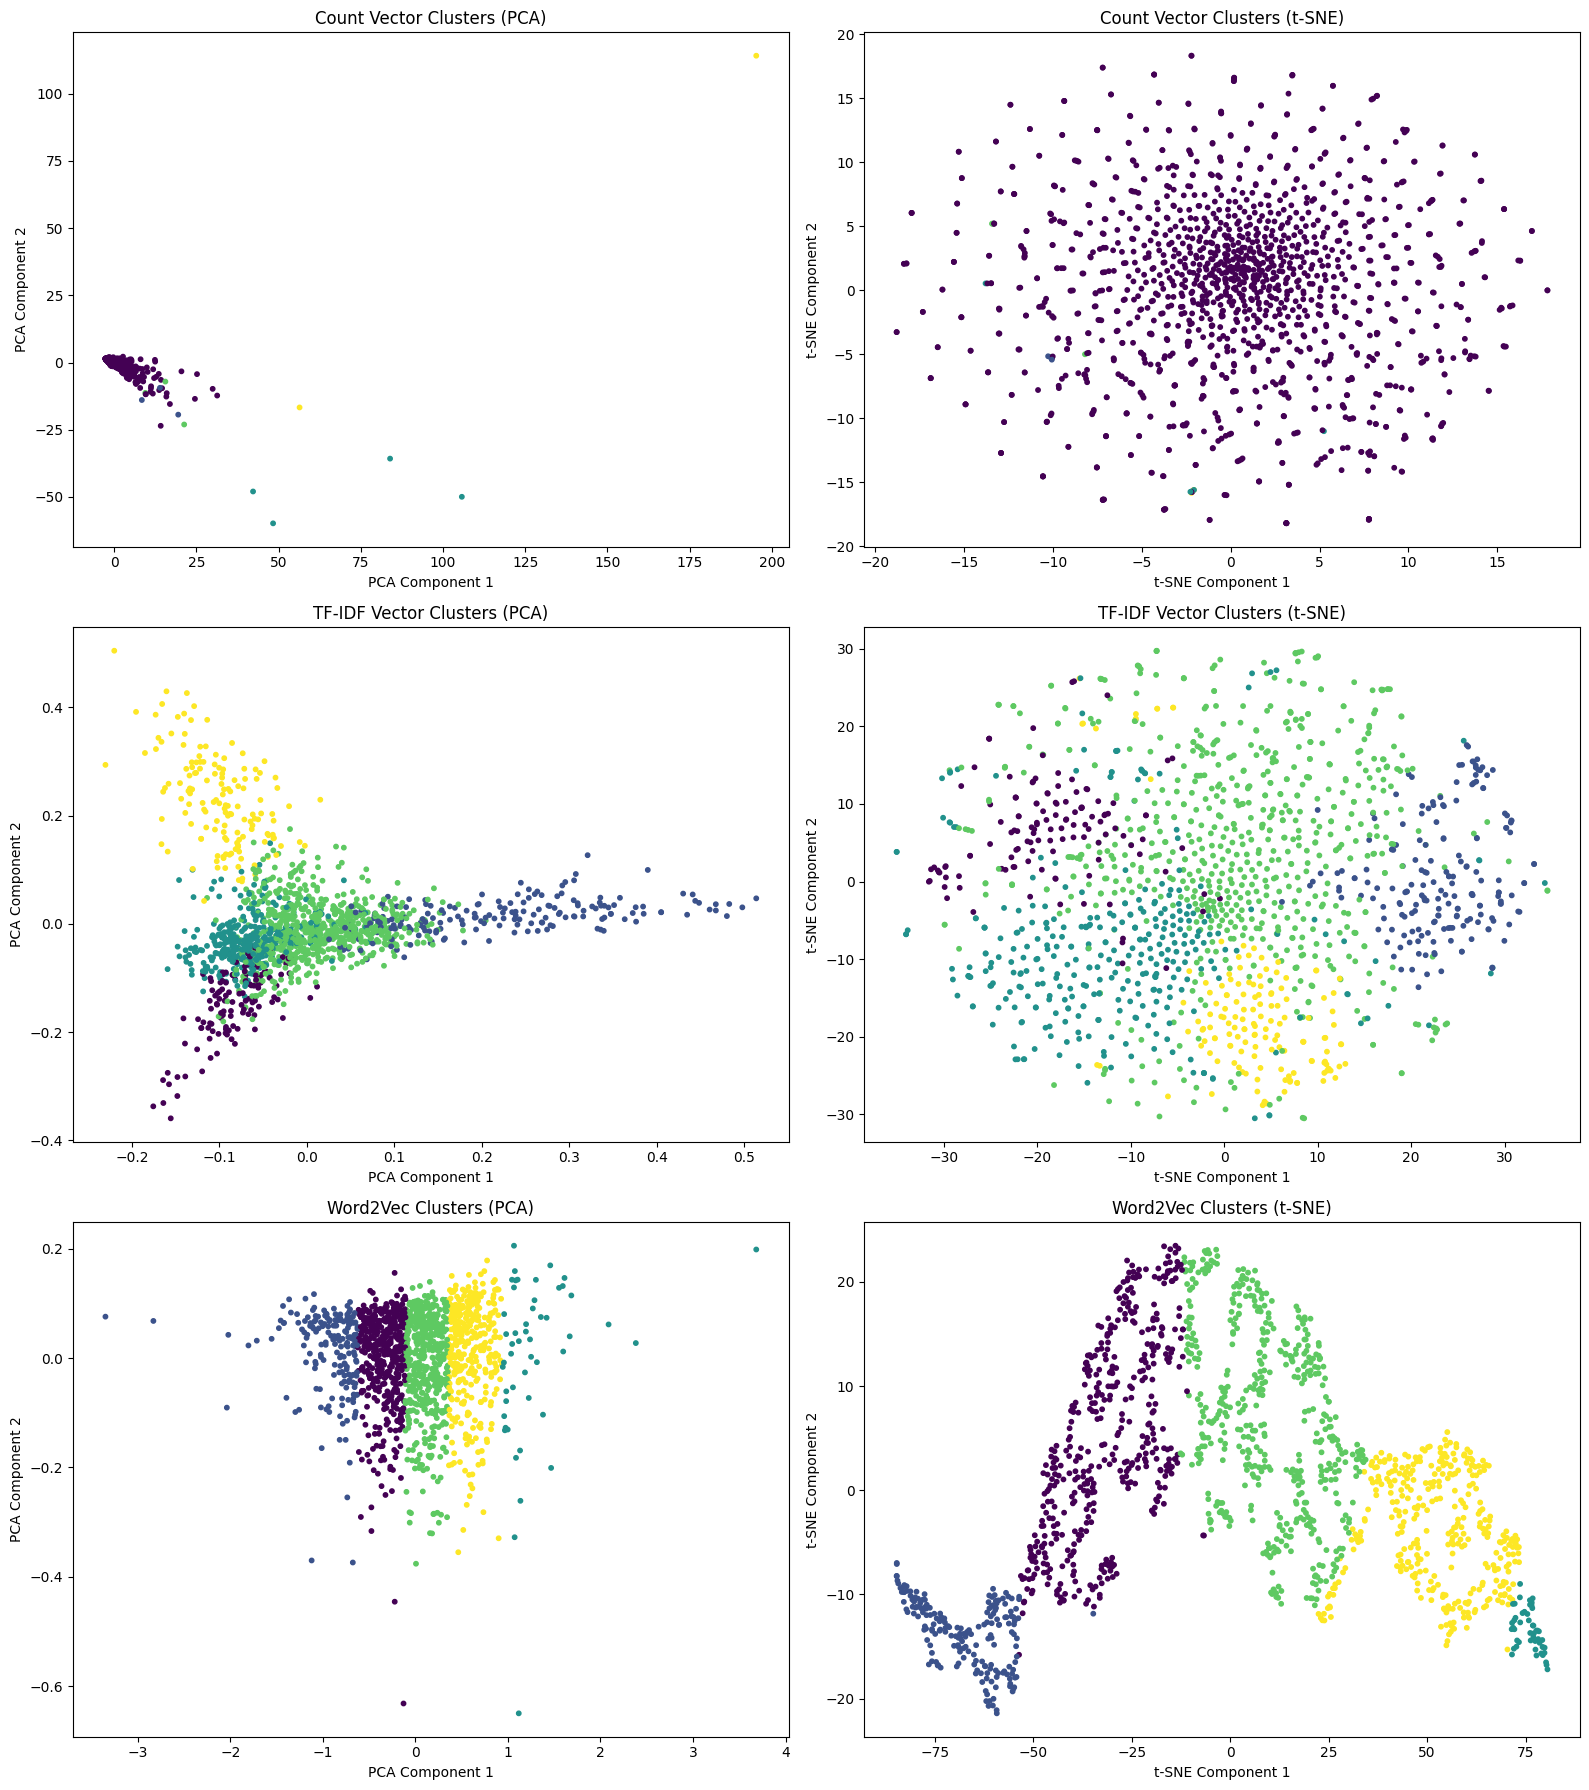

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for all vector types
vector_data = {
    "Count Vector": np.array(text_df['count_vector'].tolist()),
    "TF-IDF Vector": np.array(text_df['tfidf_vector'].tolist()),
    "Word2Vec": np.array(text_df['word2vec'].tolist())
}

vector_labels = {
    "Count Vector": text_df['count_vector_cluster'],
    "TF-IDF Vector": text_df['tfidf_vector_cluster'],
    "Word2Vec": text_df['word2vec_cluster']
}

# Create subplots for PCA and t-SNE visualizations
fig, axes = plt.subplots(len(vector_data), 2, figsize=(16, 18))

for i, (vector_name, data) in enumerate(vector_data.items()):
    labels = vector_labels[vector_name]

   
    # Apply PCA
    data_pca = apply_pca(data)

    # Apply t-SNE
    data_tsne = apply_tsne(data)

    # PCA Visualization  
    plot_clusters(axes[i, 0], data_pca, labels, f"{vector_name} Clusters (PCA)", "PCA Component 1", "PCA Component 2")

    # t-SNE Visualization
    plot_clusters(axes[i, 1], data_tsne, labels, f"{vector_name} Clusters (t-SNE)", "t-SNE Component 1", "t-SNE Component 2")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

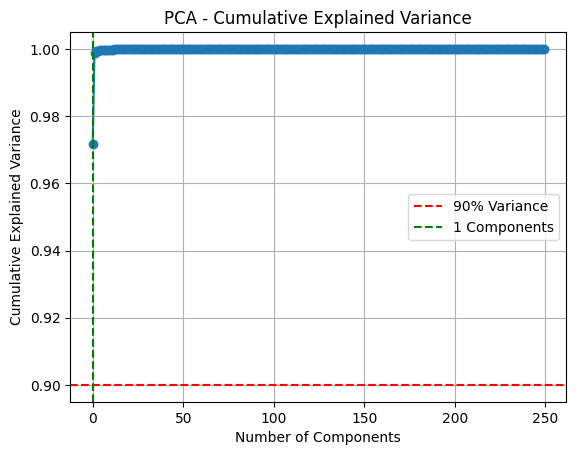

In [66]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Prepare Word2Vec data
word2vec_data = np.array(text_df['word2vec'].tolist())

# Fit PCA to the data
pca = PCA()
pca.fit_transform(word2vec_data)

  # Apply t-SNE
#tsne = TSNE()
#data_tsne = tsne.fit_transform(data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
#print("Explained Variance Ratio:", pca.explained_variance_ratio_," \n shape:",pca.explained_variance_ratio_.shape)
#print(f"Number of components to explain 90% variance: {n_components_90}")

# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=n_components_90 - 1, color='g', linestyle='--', label=f'{n_components_90} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Filter which document belongs to which cluster

In [76]:
# Filter documents belonging to a specific cluster (e.g., cluster 0)
revised_df= text_df.copy()
revised_df.drop(columns=['count_vector','tfidf_vector','count_vector_cluster','tfidf_vector_cluster'], inplace=True)


In [77]:
cluster_0_docs = revised_df[revised_df['word2vec_cluster'] == 0]
print(f"Documents in Cluster 0:")
cluster_0_docs

Documents in Cluster 0:


,text,processed_text,word2vec,word2vec_cluster
2,\nYou can get a *little* UV by putting a heavy...,get little uv putting heavy uv filter deep pur...,"[0.29504526, -0.07852392, 0.27398393, 0.179631...",0
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntppostinghost accessdigexnet trouble trying ...,"[0.28397033, -0.07506709, 0.25680313, 0.162906...",0
4,\n\n\nI understand that the new GPS boxes now ...,understand new gps box option known differenti...,"[0.28102568, -0.072217435, 0.25796387, 0.16602...",0
5,Distribution: world\nNNTP-Posting-Host: kelvin...,distribution world nntppostinghost kelvinjplna...,"[0.29723507, -0.081395485, 0.26039624, 0.15932...",0
7,"\nCharles Parr, on the Tue, 20 Apr 93 21:25:10...",charles parr tue 20 apr 93 212510 gmt wibbled ...,"[0.2886133, -0.077397004, 0.26351643, 0.167104...",0
...,...,...,...,...
1489,\n\n--\n\nI would like to be able to detect th...,would like able detect angular position low ac...,"[0.30603465, -0.0799695, 0.28335688, 0.1853345...",0
1494,\nAaron Lung (alung@megatest.com) wrote:\n: >I...,aaron lung alungmegatestcom wrote also sceptic...,"[0.31543344, -0.08407175, 0.29121363, 0.191033...",0
1495,Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...,nntppostinghost wcsubctstateuedu organization ...,"[0.28948838, -0.07803371, 0.25977, 0.16358633,...",0
1497,"\nIn article <79895@cup.portal.com>, Thyagi@cu...",article 79895cupportalcom thyagicupportalcom t...,"[0.2995023, -0.08067367, 0.27043873, 0.1701105...",0


In [78]:
cluster_4_docs = revised_df[revised_df['word2vec_cluster'] == 4]
print(f"Documents in Cluster 4:")
cluster_4_docs

Documents in Cluster 4:


,text,processed_text,word2vec,word2vec_cluster
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,article 1993apr191311027843rchlandibmcom xzz02...,"[0.38561186, -0.10800423, 0.34846324, 0.218907...",4
8,Reply-To: an030@cleveland.Freenet.Edu (Broward...,replyto an030clevelandfreenetedu broward horne...,"[0.39700738, -0.10795407, 0.36272907, 0.231141...",4
10,NNTP-Posting-Host: life.ai.mit.edu\n\n\n\n\n\n...,nntppostinghost lifeaimitedu white house offic...,"[0.40976864, -0.10819545, 0.38106272, 0.249059...",4
11,\nfsset@bach.lerc.nasa.gov (Scott Townsend) wr...,fssetbachlercnasagov scott townsend writes got...,"[0.3764173, -0.10137863, 0.34236622, 0.2197100...",4
15,\nIn article <1993Apr18.091051.14496@ke4zv.uuc...,article 1993apr1809105114496ke4zvuucp garyke4z...,"[0.38183048, -0.103558734, 0.34625942, 0.22172...",4
...,...,...,...,...
1480,\nIn <1psg95$ree@access.digex.net> prb@access....,1psg95reeaccessdigexnet prbaccessdigexcom pat ...,"[0.3992964, -0.107624605, 0.36479855, 0.233101...",4
1483,Distribution: world\nReply-To: egreen@east.sun...,distribution world replyto egreeneastsuncom nn...,"[0.39675307, -0.111018695, 0.34994853, 0.21091...",4
1490,\nIn article <bskendigC5I9yH.ICp@netcom.com> b...,article bskendigc5i9yhicpnetcomcom bskendignet...,"[0.39572918, -0.11134681, 0.35985452, 0.224653...",4
1492,NNTP-Posting-Host: saltillo.cs.utexas.edu\nSum...,nntppostinghost saltillocsutexasedu summary sp...,"[0.36649355, -0.0983748, 0.3369481, 0.21785331...",4


# Visualize Silhouette Scores for Each Cluster

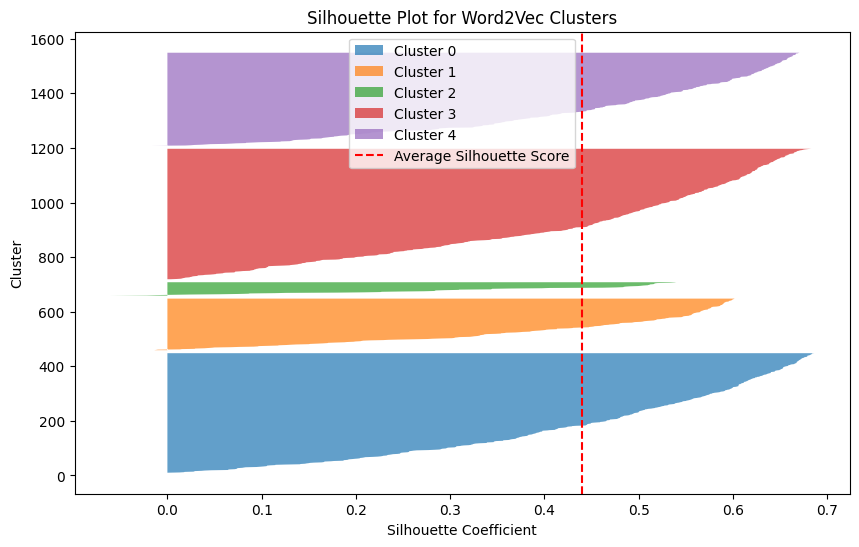

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples


word2vec_data = np.array(revised_df['word2vec'].tolist())
word2vec_labels= np.array(revised_df['word2vec_cluster'].tolist())
# Calculate silhouette scores for each document
silhouette_values = silhouette_samples(word2vec_data, word2vec_labels)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):  # Assuming 5 clusters
    ith_cluster_silhouette_values = silhouette_values[word2vec_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
        label=f"Cluster {i}"
    )
    y_lower = y_upper + 10  # Add space between clusters

plt.axvline(x=silhouette_values.mean(), color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for Word2Vec Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.show()

# Selective resampling:
1. Oversample Minority Clusters: using SMOTE
2. Undersampling Majority clusters: 

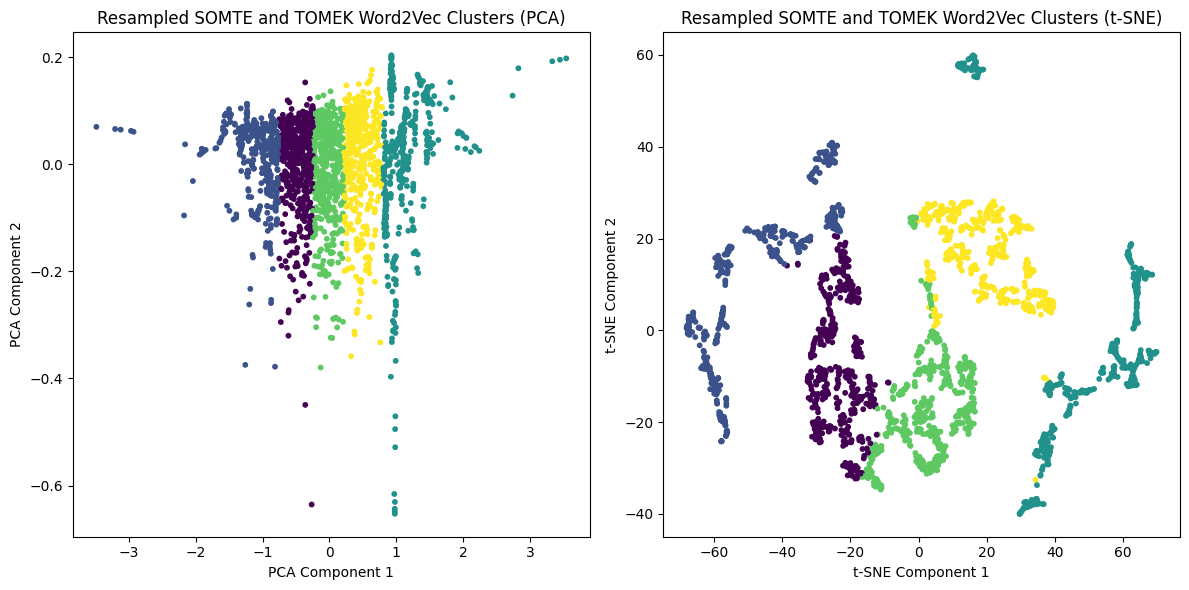

In [88]:
# Resampling 

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Extract Word2Vec data and cluster labels from revised_df
word2vec_data = np.array(revised_df['word2vec'].tolist())
word2vec_labels = np.array(revised_df['word2vec_cluster'].tolist())


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(word2vec_data, word2vec_labels)

# Apply Tomek Links resampling
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled)



resampled_df = pd.DataFrame({
    're_word2vec': list(X_resampled),
    're_word2vec_cluster': y_resampled
})


# Apply PCA and t-SNE on the resampled data
pca_data = apply_pca(X_resampled)
tsne_data = apply_tsne(X_resampled)

# Create subplots for PCA and t-SNE visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot PCA
plot_clusters(
    ax=axes[0],
    data=pca_data,
    labels=y_resampled,
    title="Resampled SOMTE and TOMEK Word2Vec Clusters (PCA)",
    xlabel="PCA Component 1",
    ylabel="PCA Component 2"
)

# Plot t-SNE
plot_clusters(
    ax=axes[1],
    data=tsne_data,
    labels=y_resampled,
    title="Resampled SOMTE and TOMEK Word2Vec Clusters (t-SNE)",
    xlabel="t-SNE Component 1",
    ylabel="t-SNE Component 2"
)

# Show plots
plt.tight_layout()
plt.show()


In [89]:
resampled_df

,re_word2vec,re_word2vec_cluster
0,"[0.3276606, -0.088350356, 0.29693392, 0.189302...",3
1,"[0.38561186, -0.10800423, 0.34846324, 0.218907...",4
2,"[0.29504526, -0.07852392, 0.27398393, 0.179631...",0
3,"[0.28397033, -0.07506709, 0.25680313, 0.162906...",0
4,"[0.28102568, -0.072217435, 0.25796387, 0.16602...",0
...,...,...
2389,"[0.3840688, -0.105224624, 0.3464643, 0.2176383...",4
2390,"[0.37395346, -0.09967501, 0.34442437, 0.224102...",4
2391,"[0.4063535, -0.10746182, 0.3713628, 0.24171315...",4
2392,"[0.36535454, -0.097130425, 0.33826697, 0.22211...",4


# resampling 
due to resampling performance metrices of the model drops, so dropping the resampling and 
If class imbalance is a concern for classification:
1. Use classifier-level techniques like class weights
2. Try probability calibration methods
3. Consider ensemble methods that handle imbalance well (like XGBoost)

In [91]:
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
resampled_df['re_word2vec_cluster'] = kmeans_word2vec.fit_predict(np.array(resampled_df['re_word2vec'].tolist()))
kmeans_word2vec_lables = kmeans_word2vec.labels_

summary_metrics = pd.DataFrame({
    "Vector Method": ["word2vec"],
    "Inertia": [
        kmeans_word2vec.inertia_
    ],
    "Silhouette Score": [
        silhouette_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ]
})

summary_metrics

,Vector Method,Inertia,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,word2vec,154.297104,0.486303,5169.02472,0.641789
